## Подготовка данных

**Выполнил студент Мелехин Николай Сергеевич**

In [1]:
# Устанавливаем и импортируем библиотеки.
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Импортируем библиотеки.
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# Описание датасета

'Year', 'Month', 'Day': дата когда произошла авария.

'Weekend?': выходной день или нет

'Hour': час, когда произошла авария

'Collision Type': тип столкновения, сколько машин замешано в авварии (например 2 машины, 3+ машины, 1 машина)

'Model': Модель ноутбука

'Injury Type': вид травмы, полученной в результате авварии

'Primary Factor': главная причина почему произошла авария

'Reported_Location': место аварии

'Latitude':  широта

'Longitube': долгота


Ссылка на датасет: https://www.kaggle.com/datasets/jacksondivakarr/car-crash-dataset

In [18]:
df= pd.read_csv('car_crashes.csv')  # Можно использовать такой вариант загрузки датасета, если он лежит в одной директории с блокнотом
df

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


In [14]:
df['Weekend?'].value_counts()

Primary Factor
FAILURE TO YIELD RIGHT OF WAY               11193
FOLLOWING TOO CLOSELY                        7359
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6158
UNSAFE BACKING                               5188
RAN OFF ROAD RIGHT                           2925
DISREGARD SIGNAL/REG SIGN                    2206
SPEED TOO FAST FOR WEATHER CONDITIONS        1921
IMPROPER TURNING                             1843
ANIMAL/OBJECT IN ROADWAY                     1688
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1656
UNSAFE SPEED                                 1499
ROADWAY SURFACE CONDITION                    1270
LEFT OF CENTER                               1078
IMPROPER LANE USAGE                           985
ALCOHOLIC BEVERAGES                           805
UNSAFE LANE MOVEMENT                          756
OVERCORRECTING/OVERSTEERING                   597
IMPROPER PASSING                              496
OTHER (VEHICLE) - EXPLAIN IN NARRATIVE        472
OTHER (ENVIRONMENTAL) - EXPLAIN IN 

In [20]:
df['Weekend?'].fillna('Weekday', inplace = True)  # Заменим пропуски на самое часто встречающее значение - eng

C:\Users\Acer\AppData\Local\Temp\ipykernel_25776\3543313261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weekend?'].fillna('Weekday', inplace = True)  # Заменим пропуски на самое часто встречающее значение - eng


In [21]:
df = df.dropna(subset=['Primary Factor'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52601 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               52601 non-null  int64  
 1   Month              52601 non-null  int64  
 2   Day                52601 non-null  int64  
 3   Weekend?           52601 non-null  object 
 4   Hour               52601 non-null  float64
 5   Collision Type     52597 non-null  object 
 6   Injury Type        52601 non-null  object 
 7   Primary Factor     52601 non-null  object 
 8   Reported_Location  52586 non-null  object 
 9   Latitude           52601 non-null  float64
 10  Longitude          52601 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.8+ MB


In [25]:
df = df.dropna(subset=['Latitude', 'Longitude'])

Удалим все строки, где есть пустые значения


In [11]:
df = df.dropna(subset=['Hour', 'Collision Type', 'Injury Type', 'Primary Factor',
'Reported_Location', 'Latitude', 'Longitude'])

In [17]:
df.info()  # Теперь пропущенных значений нет

<class 'pandas.core.frame.DataFrame'>
Index: 52822 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               52822 non-null  int64  
 1   Month              52822 non-null  int64  
 2   Day                52822 non-null  int64  
 3   Weekend?           52765 non-null  object 
 4   Hour               52631 non-null  float64
 5   Collision Type     52818 non-null  object 
 6   Injury Type        52822 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  52801 non-null  object 
 9   Latitude           52792 non-null  float64
 10  Longitude          52792 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.8+ MB


In [7]:
df.duplicated().sum()  # Проверим дубликаты

62

In [8]:
df = df.drop_duplicates() # удаляем дубликаты
df = df.reset_index(drop=True) # обновим индексы
df.duplicated().sum()

0

### Делим признаки на числовые и категориальные

In [9]:
cat_columns = [] 
num_columns = [] 

for column_name in df.columns: 
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name] 
    else:
        num_columns +=[column_name] 

print(' Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print(' Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

 Категориальные данные:	  ['Weekend?', 'Collision Type', 'Injury Type', 'Primary Factor', 'Reported_Location'] 
 Число столблцов =  5
 Числовые данные:	  ['Year', 'Month', 'Day', 'Hour', 'Latitude', 'Longitude'] 
 Число столблцов =  6


# Анализ числовых признаков

In [10]:
df[['Year', 'Month', 'Day', 'Hour', 'Latitude', 'Longitude']]  # Посмотрим на числовые признаки

,Year,Month,Day,Hour,Latitude,Longitude
0,2015,1,5,0.0,39.159207,-86.525874
1,2015,1,6,1500.0,39.161440,-86.534848
2,2015,1,6,2300.0,39.149780,-86.568890
3,2015,1,7,900.0,39.165655,-86.575956
4,2015,1,7,1100.0,39.164848,-86.579625
...,...,...,...,...,...,...
52515,2003,10,6,1700.0,0.000000,0.000000
52516,2003,11,3,800.0,0.000000,0.000000
52517,2003,12,5,1200.0,0.000000,0.000000
52518,2003,12,1,700.0,0.000000,0.000000


In [11]:
# Выведем стандартные статистические параметры
df.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,52520.000000,52520.000000,52520.000000,52520.000000,52520.000000,52520.000000
mean,2009.001676,6.674714,4.199105,1348.699543,35.607873,-78.676261
std,3.765195,3.512379,1.906040,529.372076,11.253230,24.877008
min,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.552192
50%,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.531009
75%,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [12]:
# Посмотрим корреляции числовых столбцов
df[num_columns].corr().style.background_gradient(cmap = 'YlOrRd', # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний диапазон

,Year,Month,Day,Hour,Latitude,Longitude
Year,1.000000,-0.005394,-0.004552,-0.017887,0.065378,-0.065249
Month,-0.005394,1.000000,-0.010101,0.011405,-0.015823,0.015931
Day,-0.004552,-0.010101,1.000000,0.006536,0.004119,-0.004248
Hour,-0.017887,0.011405,0.006536,1.000000,0.007209,-0.007193
Latitude,0.065378,-0.015823,0.004119,0.007209,1.000000,-0.999389
Longitude,-0.065249,0.015931,-0.004248,-0.007193,-0.999389,1.000000


# Категориальные переменные

In [17]:
df[['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'Storage type', 'Touch']]  # Посмотрим на категориальные признаки

,Laptop,Status,Brand,Model,CPU,Storage type,Touch
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,SSD,No
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,SSD,No
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,SSD,No
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,SSD,No
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,SSD,No
...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,SSD,No
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,SSD,No
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,SSD,No
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,SSD,Yes


In [18]:
df[cat_columns].nunique() # Смотрим количество уникальных значений для каждого признака 

Laptop          2156
Status             2
Brand             27
Model            121
CPU               28
Storage type       2
Touch              2
dtype: int64

In [19]:
# Обратим внимание на признак 'Laptop'
df.Laptop

0       ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...
1       Alurin Go Start Intel Celeron N4020/8GB/256GB ...
2       ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...
3       MSI Katana GF66 12UC-082XES Intel Core i7-1270...
4       HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...
                              ...                        
2155    Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...
2156    Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...
2157    Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...
2158    Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...
2159    Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...
Name: Laptop, Length: 2156, dtype: object

Видим, что колонка 'Laptop' является компиляцией информации из других колонок, количество уникальных значений равно количеству строк. Так как информация в ней фактически дублируется, её можно удалить.

In [20]:
# Признак Model также имеет много значений, посмотрим количество уникальных
counts = df.Model.value_counts()
counts

Model
15S            115
IdeaPad        103
ROG            101
VivoBook        99
ThinkPad        98
              ... 
100w             1
Electronics      1
Cyborg           1
14S              1
GL75             1
Name: count, Length: 121, dtype: int64

In [21]:
counts.median()  # Оцениваем медиану встречаемости разных признаков

7.0

In [22]:
counts[counts<9]  # Посмотрим на марки которые встречаются реже чем 9 раз

Model
Nubian         8
Ioxbook        8
XPS            7
Surface Go     7
Titan          7
              ..
100w           1
Electronics    1
Cyborg         1
14S            1
GL75           1
Name: count, Length: 65, dtype: int64

In [23]:
rare =  counts[(counts.values < 9)]  # Находим все редкие категории
df['Model'] = df['Model'].replace(rare.index.values, 'Rare')
counts_Brand = df.Brand.value_counts()
rare_Brand=counts_Brand[(counts_Brand.values < 9)]
df['Brand'] = df['Brand'].replace(rare_Brand.index.values, 'Rare')
counts_CPU = df.CPU.value_counts()
rare_CPU=counts_CPU[(counts_CPU.values < 9)]
df['CPU'] = df['CPU'].replace(rare_CPU.index.values, 'Rare')
df.Model.value_counts()  # Пересчитаем сколько кого осталось

Model
Rare              181
15S               115
IdeaPad           103
ROG               101
VivoBook           99
ThinkPad           98
MacBook Pro        68
TUF                58
V15                56
Chromebook         50
MacBook Air        44
ZenBook            43
ExpertBook         43
Latitude           43
ThinkBook          43
Creator            42
Modern             40
Surface Laptop     40
Aspire             39
Prestige           38
EliteBook          36
Blade              35
Raider             34
Stealth            34
250                34
Victus             32
Omen               31
Surface Pro        30
Vostro             30
ProBook            27
Gram               27
Legion             26
Katana             26
Pavilion           24
Revolt             24
Extensa            23
Aorus              23
Zbook              21
Yoga               21
Pulse              21
Nitro              20
F515               20
Akoya              20
255                20
Aero               19
Gala

In [24]:
df.Brand.value_counts()

Brand
Asus                415
HP                  367
Lenovo              364
MSI                 308
Acer                136
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Rare                 35
LG                   32
Medion               32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Name: count, dtype: int64

In [25]:
df.CPU.value_counts()

CPU
Intel Core i7        708
Intel Core i5        534
AMD Ryzen 7          156
Intel Core i3        130
AMD Ryzen 5          126
Intel Celeron         94
Intel Core i9         94
Intel Evo Core i7     82
AMD Ryzen 3           44
AMD Ryzen 9           44
Intel Evo Core i5     30
Rare                  29
Apple M2              28
AMD 3020e             13
Apple M2 Pro          13
Apple M1              11
AMD Athlon            10
Intel Pentium         10
Name: count, dtype: int64

# Визуализация данных 

Рассмотрим гистограммы (распределение) значений по каждому числовому признаку 

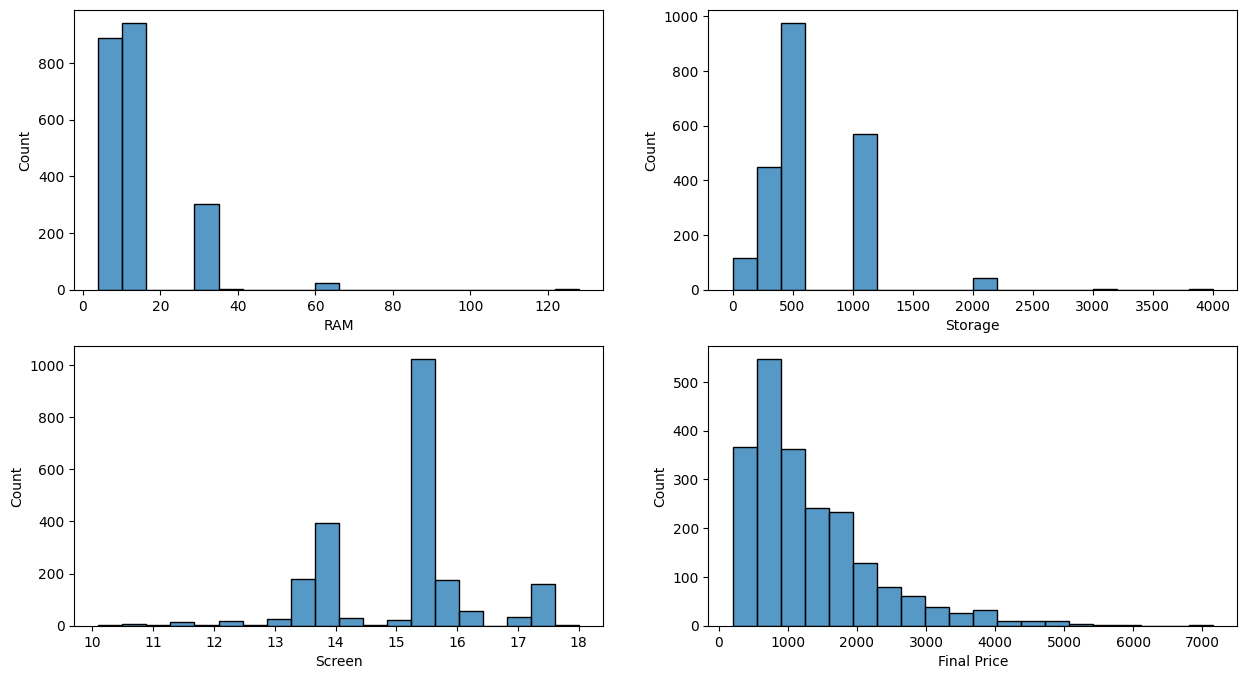

In [26]:
width = 2
height = int(np.ceil(len(num_columns) / width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(15, 8))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height, width, idx + 1)

    sns.histplot(data=df, x=column_name, bins=20)

Данные имеют аномалии. Рассмотрим колонку 'Final Price' в логарифмическом масштабе.

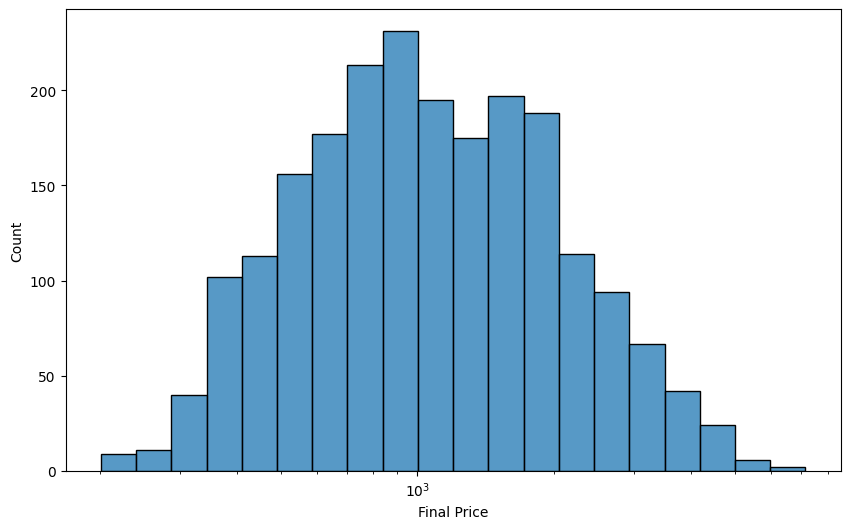

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, 
             x='Final Price',
             bins = 20, 
             log_scale = True);  # Логарифмический масштаб (для очень больших диапазонов)

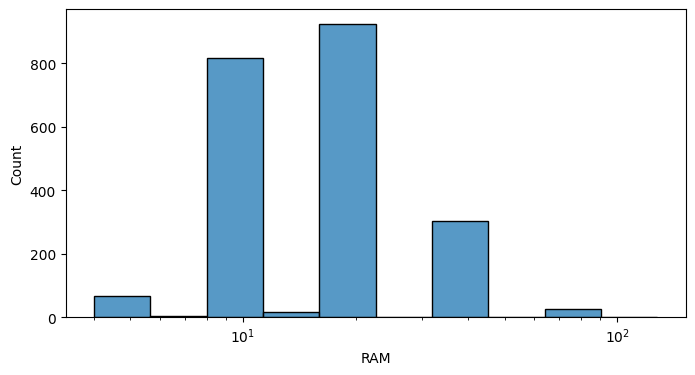

In [28]:
# Рассмотрим признак RAM подробнее

plt.figure(figsize=(8,4))
sns.histplot(data=df,
        x='RAM',
        bins = 10,
        log_scale = True);

 ## Зависимости параметров друг от друга

C:\Users\Killroy\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


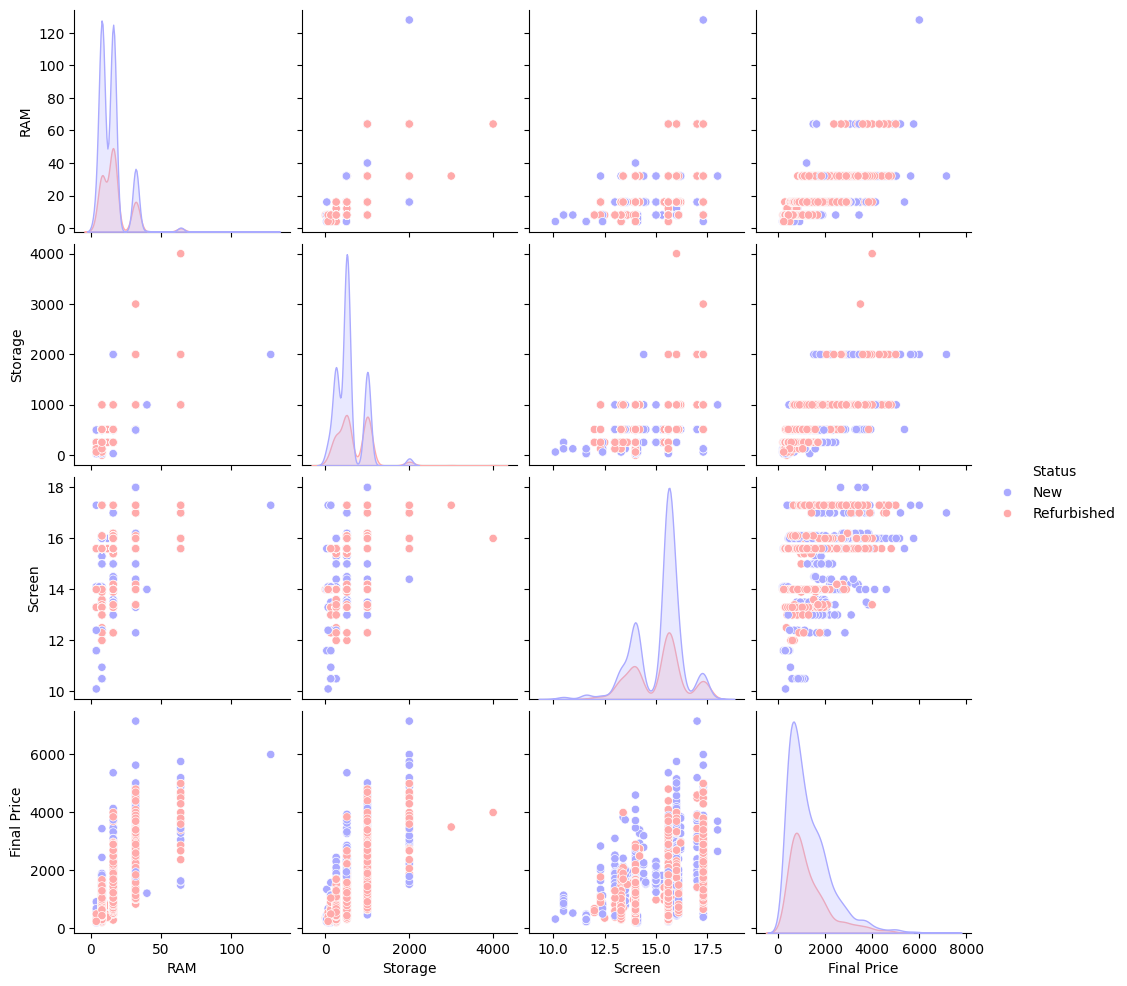

In [29]:

sns.pairplot(data = df,  # какой датафрейм используем
             hue ='Status',  # какую переменную используем для подкрашиваиния данных.
                                # Рекомендуется использовать Категориальные данные (не очень много уникальных значений)
             palette = 'bwr');  # какую цветовую карту используем. Здесь у нас всего 2 варианта, то мы используем bwr - один из Diverging
                                # если категорий больше, то лучше использовать что-то из Qualitative

## Построим скатерограмму, которая показывает зависимость производителя и стоимости ноутбуков от status

<Axes: xlabel='Final Price', ylabel='Brand'>

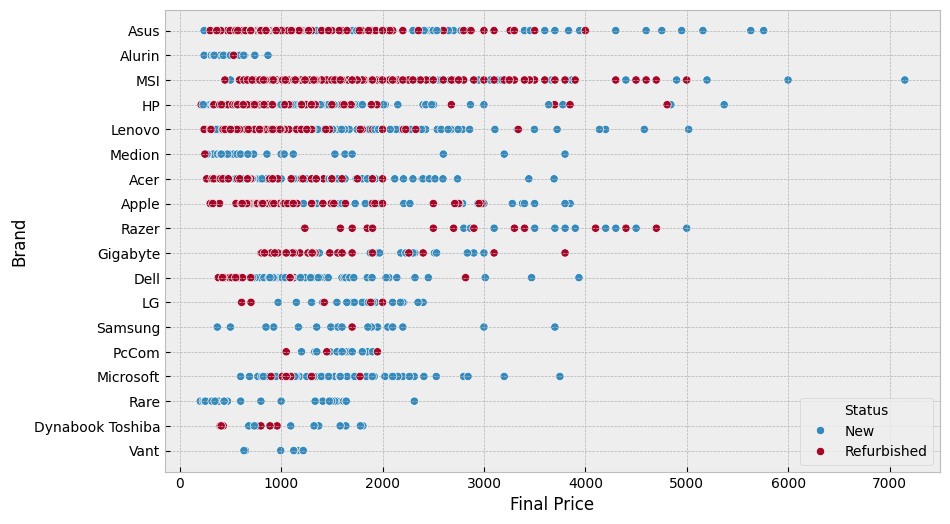

In [30]:
plt.style.use('bmh')
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.scatterplot(data=df,
                x='Final Price', y='Brand',
                hue='Status', 
                )


Видим, что среди ноутбуков с высокой стоимостью ожидаемо прелбладают новые.

## Построим скатерограмму, которая показывает зависимость стоимости ноутбуков и диагонали экрана от status

<Axes: xlabel='Final Price', ylabel='Screen'>

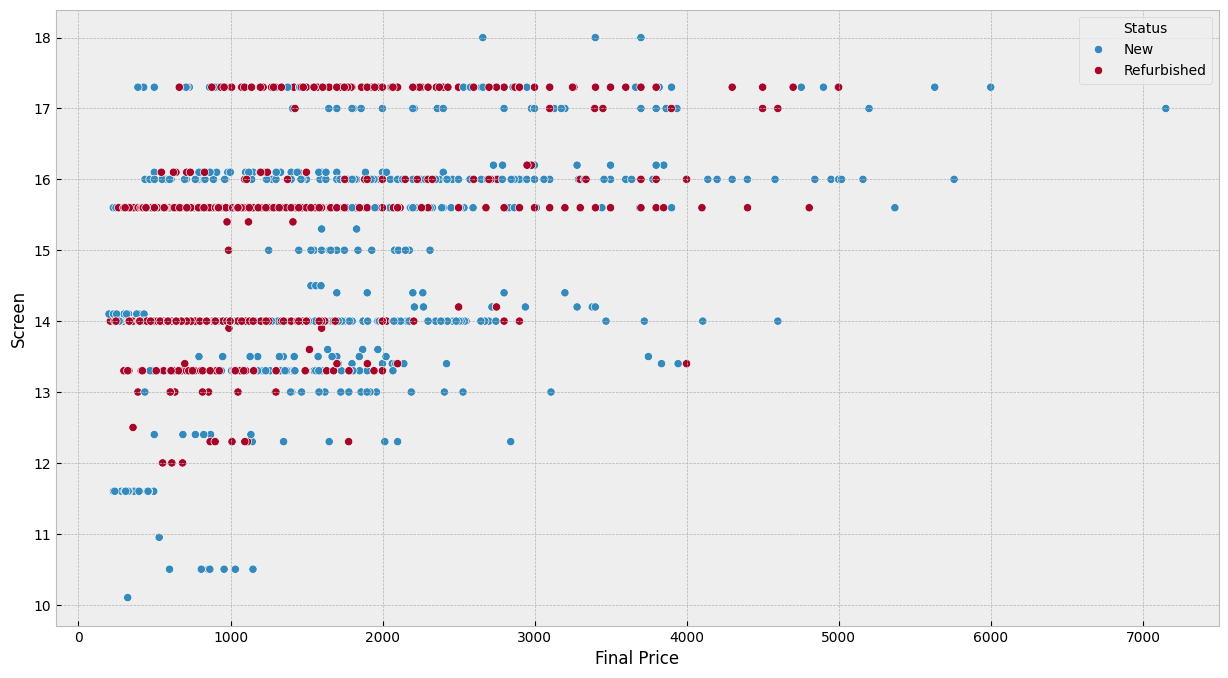

In [31]:
plt.style.use('bmh')
fig, ax = plt.subplots(1, figsize=(15, 8))
sns.scatterplot(data=df,
                x='Final Price', y='Screen',
                hue='Status', 
                ax=ax)


Видно, что новые ноутбуки с большим экраном чаще стоят дороже, чем ноутбуки с диагональю менее 14 дюймов. Ожидаемо, что самые дешёвые ноутбуки с маленьким экраном и/или бывшие в ремонте. 

 ## Рассмотрим графики распpеделения категориальных переменных в завмсимоти от 'Status'

####  Распределение по брендам

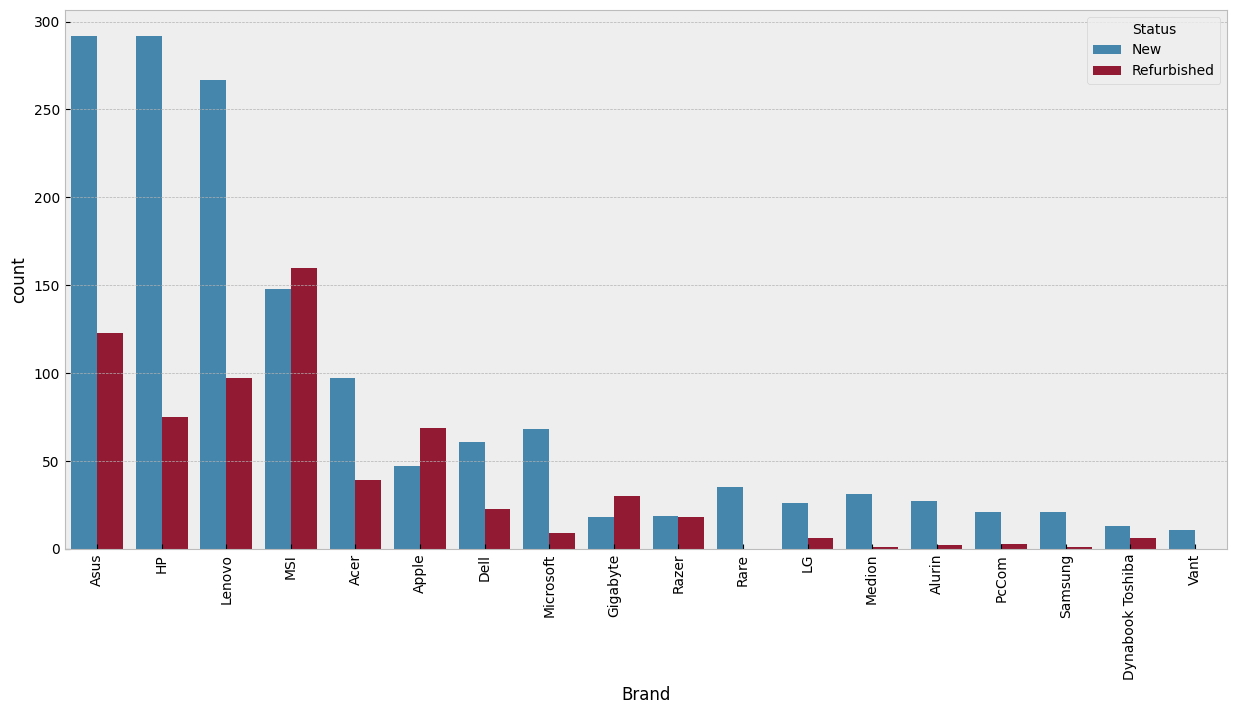

In [32]:
fig, ax = plt.subplots(1, figsize=(15, 7))
sns.countplot(data=df, x='Brand', hue='Status',order=df['Brand'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

Больше всего ноутбуков Asus, HP и  Lenovo. Заметим что по некоторым брендам восстановленных ноутбуков больше, чем новых (MSI, Apple, Gigabyte).

#### Распределение по моделям процессора 

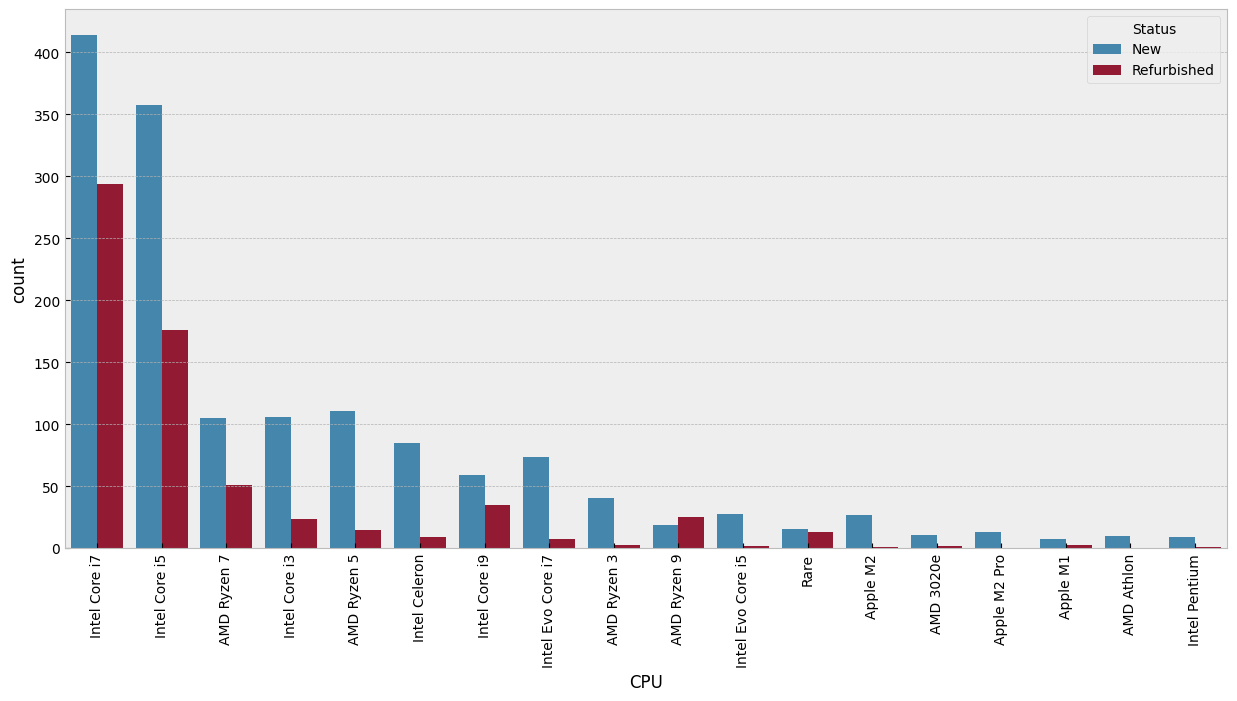

In [33]:
fig, ax = plt.subplots(1, figsize=(15, 7))
sns.countplot(data=df, x='CPU', hue='Status', order=df['CPU'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

Самыми популярными молелями являются  Intel Core i7, Intel Core i5 и AMD Ryzen 7.